##  Creating the Database for the Virtualization

In [1]:
CREATE DATABASE AdvWorksDW
GO

USE AdvWorksDW
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:01.697

## Creating the Credential to Access the Remote Azure SQL Database

In [2]:
create master key encryption by password='6964xpahw@@'
GO

CREATE DATABASE SCOPED CREDENTIAL [AdvDWLogin]
WITH Identity='Dennes',  
SECRET = 'Wmhapx4696'
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.039

## Creating the Extenal Data Source pointing to the existing Data Warehouse

### **Scale-out groups**

A compute pool can act as a PolyBase scale-out group for distributed queries over different external data sources such as SQL Server, Oracle, MongoDB, Teradata and HDFS. By using compute pods in Kubernetes, a SQL Server big data cluster can automate creating and configuring compute pods for PolyBase scale-out groups.

## [](https://docs.microsoft.com/en-us/sql/big-data-cluster/concept-compute-pool?view=sql-server-ver15#compute-pool-scenarios)Compute pool scenarios

**Scenarios where the compute pool is used include:**

-   When queries submitted to the master instance use one or more tables located in the [storage pool](https://docs.microsoft.com/en-us/sql/big-data-cluster/concept-storage-pool?view=sql-server-ver15).
    
-   When queries submitted to the master instance use one or more tables with round-robin distribution located in the [data pool](https://docs.microsoft.com/en-us/sql/big-data-cluster/concept-data-pool?view=sql-server-ver15).
    
-   When queries submitted to the master instance use partitioned tables with external data sources of SQL Server, Oracle, MongoDB, and Teradata. For this scenario, the query hint OPTION (FORCE SCALEOUTEXECUTION) must be enabled.
    
-   When queries submitted to the master instance use one or more tables located in [HDFS tiering](https://docs.microsoft.com/en-us/sql/big-data-cluster/hdfs-tiering?view=sql-server-ver15).
    

**Scenarios where the compute pool is not used include:**

-   When queries submitted to the master instance use one or more tables in an external Hadoop HDFS cluster.
    
-   When queries submitted to the master instance use one or more tables in Azure Blob Storage.
    
-   When queries submitted to the master instance use non-partitioned tables with external data sources of SQL Server, Oracle, MongoDB, and Teradata.
    
-   When the query hint OPTION (DISABLE SCALEOUTEXECUTION) is enabled.
    
-   When queries submitted to the master instance apply to databases located on the master instance.
    

  Ref: [How Compute Pools Work](https://docs.microsoft.com/en-us/sql/big-data-cluster/concept-compute-pool?view=sql-server-ver15&WT.mc_id=DP-MVP-4014132)

## 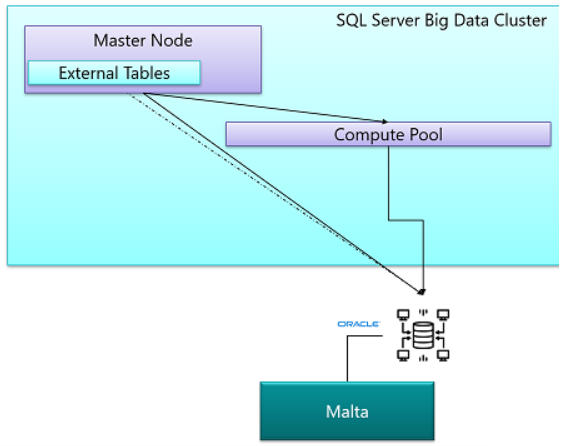

In [3]:
CREATE EXTERNAL DATA SOURCE AdventureVirtual
WITH
  (  LOCATION = 'sqlserver://bdcextendedsample.database.windows.net'
     , CREDENTIAL = AdvDWLogin 
     , PUSHDOWN =  ON  
     )


Commands completed successfully.

Total execution time: 00:00:00.103

# Creating External Tables

We use the data source and credentials already created to create the external tables. 

Maybe, in the future, the syntax will spare us from specifying all the fields for each table, at least for some data sources.

In [4]:
CREATE EXTERNAL TABLE [dbo].[FactInternetSales](
	[ProductKey] [int] NOT NULL,
	[OrderDateKey] [int] NOT NULL,
	[DueDateKey] [int] NOT NULL,
	[ShipDateKey] [int] NOT NULL,
	[CustomerKey] [int] NOT NULL,
	[PromotionKey] [int] NOT NULL,
	[CurrencyKey] [int] NOT NULL,
	[SalesTerritoryKey] [int] NOT NULL,
	[SalesOrderNumber] [nvarchar](20) NOT NULL,
	[SalesOrderLineNumber] [tinyint] NOT NULL,
	[RevisionNumber] [tinyint] NOT NULL,
	[OrderQuantity] [smallint] NOT NULL,
	[UnitPrice] [money] NOT NULL,
	[ExtendedAmount] [money] NOT NULL,
	[UnitPriceDiscountPct] [float] NOT NULL,
	[DiscountAmount] [float] NOT NULL,
	[ProductStandardCost] [money] NOT NULL,
	[TotalProductCost] [money] NOT NULL,
	[SalesAmount] [money] NOT NULL,
	[TaxAmt] [money] NOT NULL,
	[Freight] [money] NOT NULL,
	[CarrierTrackingNumber] [nvarchar](25) NULL,
	[CustomerPONumber] [nvarchar](25) NULL,
	[OrderDate] [datetime] NULL,
	[DueDate] [datetime] NULL,
	[ShipDate] [datetime] NULL
) 
    WITH (   
        LOCATION = 'AdventureWorksDW2016.dbo.FactInternetSales',  
        DATA_SOURCE = AdventureVirtual
    )  
GO

CREATE EXTERNAL TABLE [dbo].[DimCustomer](
	[CustomerKey] [int]  NOT NULL,
	[GeographyKey] [int] NULL,
	[CustomerAlternateKey] [nvarchar](15) NOT NULL,
	[Title] [nvarchar](8) NULL,
	[FirstName] [nvarchar](50) NULL,
	[MiddleName] [nvarchar](50) NULL,
	[LastName] [nvarchar](50) NULL,
	[NameStyle] [bit] NULL,
	[BirthDate] [date] NULL,
	[MaritalStatus] [nchar](1) NULL,
	[Suffix] [nvarchar](10) NULL,
	[Gender] [nvarchar](1) NULL,
	[EmailAddress] [nvarchar](50) NULL,
	[YearlyIncome] [money] NULL,
	[TotalChildren] [tinyint] NULL,
	[NumberChildrenAtHome] [tinyint] NULL,
	[EnglishEducation] [nvarchar](40) NULL,
	[SpanishEducation] [nvarchar](40) NULL,
	[FrenchEducation] [nvarchar](40) NULL,
	[EnglishOccupation] [nvarchar](100) NULL,
	[SpanishOccupation] [nvarchar](100) NULL,
	[FrenchOccupation] [nvarchar](100) NULL,
	[HouseOwnerFlag] [nchar](1) NULL,
	[NumberCarsOwned] [tinyint] NULL,
	[AddressLine1] [nvarchar](120) NULL,
	[AddressLine2] [nvarchar](120) NULL,
	[Phone] [nvarchar](20) NULL,
	[DateFirstPurchase] [date] NULL,
	[CommuteDistance] [nvarchar](15) NULL 
)
   WITH (   
        LOCATION = 'AdventureWorksDW2016.dbo.DimCustomer',  
        DATA_SOURCE = AdventureVirtual
    )  
GO

CREATE EXTERNAL TABLE [dbo].[FactProductInventory](
	[ProductKey] [int] NOT NULL,
	[DateKey] [int] NOT NULL,
	[MovementDate] [date] NOT NULL,
	[UnitCost] [money] NOT NULL,
	[UnitsIn] [int] NOT NULL,
	[UnitsOut] [int] NOT NULL,
	[UnitsBalance] [int] NOT NULL

)   WITH (   
        LOCATION = 'AdventureWorksDW2016.dbo.FactProductInventory',  
        DATA_SOURCE = AdventureVirtual
    ) 
GO





Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.454

## **Non-Distributed Query**

This query is to another SQL Server. Without using the query hint, it will not be distributed to the Compute pool, according the explanation above on this file.

The following executions prove this concept

In [ ]:
select count(*) from dbo.FactInternetSales


##  **Analyzing the Query Execution**

### **Compute Pools**

On this example we have 1 single pool with 1 node making the role of **Head** and **Compute**. Each pool have one Head and many Compute nodes.

The **Master** node is a **Compute** node as well, but without any pool registered, the pool id is considered 0 and it will be used when SQL Server decides to not use the compute pools, only the **Master**.

In [ ]:
select cn.compute_pool_id,compute_node_id,
        type,cn.name, location from sys.dm_exec_compute_pools cp
right outer join sys.dm_exec_compute_nodes cn
on cp.compute_pool_id=cn.compute_pool_id

**Getting the Execution Id**

In [ ]:
select top 8 execution_id, status, start_time,end_time,
            compute_pool_id, text,dbid 
 from sys.dm_exec_distributed_requests
cross apply sys.dm_exec_sql_text(sql_handle) st
order by start_time desc

### **Identifying the Steps Executed**

On this example, there was no scale out, so the compute pool is 0 - the execution was in the master

**Location Types**

* **Head:** Head of the Compute Pool

* **Compute:** Node of the Compute Pool

* **DMS:** Data Movement Service - External Polybase Service

In [ ]:
select execution_id,step_index, operation_type,
        distribution_type, location_type,
        row_count,command,
        compute_pool_id, status
 from sys.dm_exec_distributed_request_steps
where execution_id='QID781'
order by step_index

 **DMS**

The first DMS step is broke down in 16 pieces, 8 external reads and 8 writes on the compute nodes

However, if you notice the start and end time of the EXTERNAL\_READER you will notice only the first one were executed. Something similar also happens with the writer, however, the writer uses CPU on the compute node, the EXTERNAL\_READER doesn't consume remote resource

In [ ]:
select execution_id, step_index,dms_step_index 
        , [type],
        compute_pool_id,query_time,
        [status],rows_processed,source_info,destination_info
 from sys.dm_exec_dms_workers
where execution_id='QID781' and step_index=2
order by dms_step_index

 **DMS Step 2**

The 2nd DMS step summarizes and return the result, in two tasks

In [ ]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID781' and step_index=3

##  **Partitioned non-distributed query**

The query below once again will not use the compute node. However, the target table is partitioned, so the query will be broke down in as much steps as the number of partitions plus 1

In [ ]:
select count(*) from dbo.FactProductInventory

In [ ]:
select top 8 execution_id, status, start_time,end_time,
            compute_pool_id, text,dbid 
 from sys.dm_exec_distributed_requests
cross apply sys.dm_exec_sql_text(sql_handle) st
order by start_time desc

In [ ]:
select execution_id,step_index, operation_type,
        distribution_type, location_type,
        row_count,command,
        compute_pool_id, status
 from sys.dm_exec_distributed_request_steps
where execution_id='QID802'
order by step_index

 **DMS Step 2 Partitioned**

This time 6 or the EXTERNAL\_READER steps were really executed, because the target table has 6 partitions

In [ ]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID802' and step_index=2
order by dms_step_index

In [ ]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID802' and step_index=3

## **Partitioned Scaled Out Execution**

Using SQL, the Scale Out only happens if the destination is partitioned and the hint is used. The rules are above in this notebook.

This time the Compute Pool is 1, not 0.

In [ ]:
select count(*) from dbo.FactProductInventory
OPTION (FORCE SCALEOUTEXECUTION)

In [ ]:
select top 8 execution_id, status, start_time,end_time,
            compute_pool_id, text,dbid 
 from sys.dm_exec_distributed_requests
cross apply sys.dm_exec_sql_text(sql_handle) st
order by start_time desc

 **Steps for Scale Out**

Due to the scale out, there is one DMS step less than without the scale out. The return operation is made by the compute nodes

In [ ]:
select execution_id,step_index, operation_type
        distribution_type, location_type
        row_count,command,
        compute_pool_id, status
 from sys.dm_exec_distributed_request_steps
where execution_id='QID692'
order by step_index

In [ ]:
select execution_id, step_index,dms_step_index,
         [type], compute_pool_id,
        [status],rows_processed,source_info,destination_info
from sys.dm_exec_dms_workers
where execution_id='QID692' and step_index=2

 **Compute Steps**

Compute Steps register their sub-steps on the DMV sys.dm\_exec\_distributed\_sql\_requests

In [ ]:
select execution_id, step_index,
        compute_pool_id, [status],row_count,command
from sys.dm_exec_distributed_sql_requests
where execution_id='QID692' and step_index=3
order by step_index




## **Some Practical Result**

In [ ]:
select Year(orderdate) [Year],count(*) as total from factinternetsales
group by Year(OrderDate)